# Workflow Example with E-OBS input convertor
Here we illustrate a complete workflow example using the E-OBS convertor

## Imports

In [13]:
from pathlib import Path

import xarray as xr
import pandas as pd

#The Valenspy package
import valenspy as vp 
from valenspy.inputconverter_functions import EOBS_to_CF
from valenspy._utilities import load_yml


In [2]:
#Import Converter - This input converter will not do anything to the data.
ic = vp.InputConverter(EOBS_to_CF)

ic2 = vp.InputConverter(vp.inputconverter_functions.EOBS_to_CF_new)

## 1. Convert the data

### Get the filenames of E-OBS data corresponding to CORDEX variable name


In [3]:
# User defined variable, here we look at 2m temperature. 
variable = "pr"
obsdata_name = "EOBS"

### Generate the path and filename of obs file

In [15]:
#Load the yml files
CORDEX_VARIABLES = load_yml("CORDEX_variables")
obs_LOOKUP = load_yml(f"{obsdata_name}_lookup")

In [16]:
# this will be part of the PATH generator. 

# define observational paths -- to do: update this to a seperate settings file?  -- yaml file with the paths of the observations based on the observation dataset name. 
directory = Path("/dodrio/scratch/projects/2022_200/project_input/External/observations/EOBS/0.1deg/")

# get EOBS variable corresponding to the requested variable using its look-up table
obs_var = obs_LOOKUP[variable]['raw_name']

# open the EOBS file for the corresponding variable
files = list(directory.glob("*"+obs_var+"*mean*.nc")) # Select all the netCDF files in the directory

In [6]:
# test of EOBS convertor function
EOBS_ds = ic.convert_input(files) # Convert the input to the correct format
EOBS_ds


The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['pr']


<xarray.Dataset> Size: 35GB
Dimensions:  (lat: 465, lon: 705, time: 27028)
Coordinates:
  * lat      (lat) float64 4kB 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
  * lon      (lon) float64 6kB -24.95 -24.85 -24.75 -24.65 ... 45.25 45.35 45.45
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Data variables:
    pr       (time, lat, lon) float32 35GB dask.array<chunksize=(102, 465, 705), meta=np.ndarray>
Attributes:
    E-OBS_version:       29.0e
    Conventions:         CF-1.4
    References:          http://surfobs.climate.copernicus.eu/dataaccess/acce...
    history:             Thu Feb 22 11:30:38 2024: ncks --no-abc -d time,0,27...
    NCO:                 netCDF Operators version 5.1.4 (Homepage = http://nc...
    dataset:             EOBS
    freq:                daily
    spatial_resolution:  0.1deg
    region:              europe

In [7]:
EOBS_ds_2 = ic2.convert_input(files) # Convert the input to the correct format
EOBS_ds_2

The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['pr']


<xarray.Dataset> Size: 35GB
Dimensions:    (latitude: 465, longitude: 705, time: 27028)
Coordinates:
  * latitude   (latitude) float64 4kB 25.05 25.15 25.25 ... 71.25 71.35 71.45
  * longitude  (longitude) float64 6kB -24.95 -24.85 -24.75 ... 45.35 45.45
  * time       (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Data variables:
    pr         (time, latitude, longitude) float32 35GB dask.array<chunksize=(102, 465, 705), meta=np.ndarray>
Attributes:
    E-OBS_version:       29.0e
    Conventions:         CF-1.4
    References:          http://surfobs.climate.copernicus.eu/dataaccess/acce...
    history:             Thu Feb 22 11:30:38 2024: ncks --no-abc -d time,0,27...
    NCO:                 netCDF Operators version 5.1.4 (Homepage = http://nc...
    freq:                daily
    spatial_resolution:  0.1deg
    region:              europe
    dataset:             EOBS

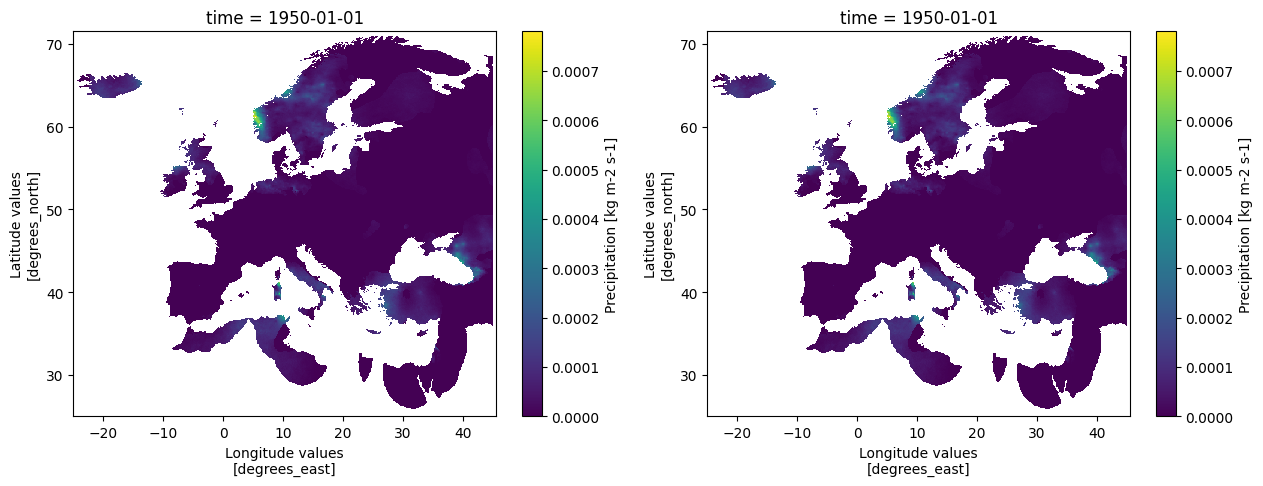

In [19]:
#Plot the first time step of the data next to each other
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,5))
EOBS_ds[variable].isel(time=0).plot(ax=ax[0])
EOBS_ds_2[variable].isel(time=0).plot(ax=ax[1])

Now you can also use the input convertor with an xarray dataset instead of list of files.

In [8]:
ds = xr.open_mfdataset(files, combine='by_coords')
vp.cf_checks.cf_status(ds)

The file is ValEnsPy CF compliant.
0.00% of the variables are ValEnsPy CF compliant
Unknown to ValEnsPy: ['rr']


In [9]:
EOBS_ds = ic.convert_input(ds) # Convert the input to the correct format 

The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['pr']


In [10]:
# test of EOBS convertor function
metadata_info = {'region': 'EUR', 'freq': 'daily', 'resolution': '0.1deg'}
EOBS_ds = ic.convert_input(files, metadata_info=metadata_info) # Convert the input to the correct format
EOBS_ds


The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['pr']


<xarray.Dataset> Size: 35GB
Dimensions:  (lat: 465, lon: 705, time: 27028)
Coordinates:
  * lat      (lat) float64 4kB 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
  * lon      (lon) float64 6kB -24.95 -24.85 -24.75 -24.65 ... 45.25 45.35 45.45
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Data variables:
    pr       (time, lat, lon) float32 35GB dask.array<chunksize=(102, 465, 705), meta=np.ndarray>
Attributes:
    E-OBS_version:  29.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Thu Feb 22 11:30:38 2024: ncks --no-abc -d time,0,27027 /...
    NCO:            netCDF Operators version 5.1.4 (Homepage = http://nco.sf....
    dataset:        EOBS
    region:         EUR
    freq:           daily
    resolution:     0.1deg